In [1]:
!pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd


In [3]:
# Fetch Car Evaluation dataset (ID = 19)
car_evaluation = fetch_ucirepo(id=19)


In [4]:
# Data (as pandas DataFrames)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Display first 5 rows
print("Features:")
display(X.head())

print("Target:")
display(y.head())


Features:


,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


Target:


,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [11]:
print("Dataset Metadata:")
print(car_evaluation.metadata)


Dataset Metadata:
{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and th

In [12]:
print("Variable Information:")
print(car_evaluation.variables)


Variable Information:
       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go... 

In [7]:
df = pd.concat([X, y], axis=1)
display(df.head())


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:

{'name': 'Car Evaluation',
 'id': 19,
 'num_instances': 1728,
 'num_features': 6,
 'num_targets': 1,
 'task': 'classification'}


{'name': 'Car Evaluation',
 'id': 19,
 'num_instances': 1728,
 'num_features': 6,
 'num_targets': 1,
 'task': 'classification'}

In [ ]:
from sklearn.model_slection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier,

In [13]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
car_data = fetch_ucirepo(id=19)
X = car_data.data.features
y = car_data.data.targets

# Combine for easy handling
df = pd.concat([X, y], axis=1)
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
# Convert numeric-like strings to actual numbers
df['doors'] = df['doors'].replace({'5more': 5}).astype(int)
df['persons'] = df['persons'].replace({'more': 6}).astype(int)


In [15]:
# Manual mapping for categorical columns
buying_map = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
maint_map = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
lug_boot_map = {'small': 0, 'med': 1, 'big': 2}
safety_map = {'low': 0, 'med': 1, 'high': 2}
class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

# Apply mappings
df['buying'] = df['buying'].map(buying_map)
df['maint'] = df['maint'].map(maint_map)
df['lug_boot'] = df['lug_boot'].map(lug_boot_map)
df['safety'] = df['safety'].map(safety_map)
df['class'] = df['class'].map(class_map)


In [16]:
X = df.drop('class', axis=1)
y = df['class']


In [17]:
# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree
dtc_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Perform Cross Validation
cv_scores = cross_val_score(dtc_model, X, y, cv=kfold)

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross Validation Scores: [0.96531792 0.97687861 0.98843931 0.97681159 0.96811594]
Mean Accuracy: 0.9751126748764346


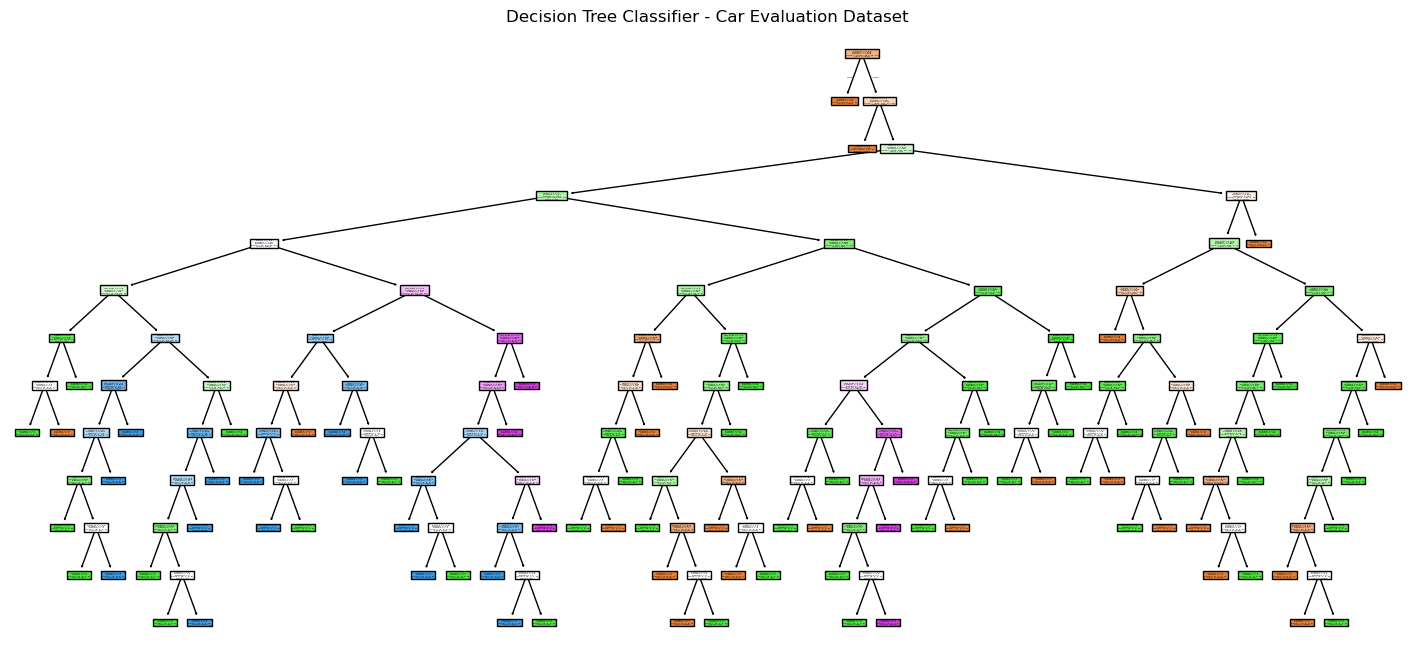

In [18]:
# Train on full data
final_model = dtc_model.fit(X, y)

# Plot Decision Tree
plt.figure(figsize=(18,8))
plot_tree(final_model, filled=True, feature_names=X.columns, class_names=['unacc','acc','good','vgood'])
plt.title("Decision Tree Classifier - Car Evaluation Dataset")
plt.show()
